In [1]:
import os, shutil

In [2]:
base_dir = '/home/skhatter/Damage_Detection'
train_dir = '/home/skhatter/Damage_Detection_New/train'
valid_dir = '/home/skhatter/Damage Detection/validation'
test_dir = '/home/skhatter/Damage Detection/test'

train_dam_dir = '/home/skhatter/Damage_Detection_New/train/damaged'
train_undam_dir = '/home/skhatter/Damage_Detection_New/train/undamaged'

valid_dam_dir = '/home/skhatter/Damage Detection/validation/damaged'
valid_undam_dir = '/home/skhatter/Damage Detection/validation/undamaged'

test_dir = '/home/skhatter/Damage Detection/test'

In [3]:
print('Total training damaged images', len(os.listdir(train_dam_dir)))
print('Total training undamaged images', len(os.listdir(train_undam_dir)))

print('Total validation damaged images', len(os.listdir(valid_dam_dir)))
print('Total validation undamaged images', len(os.listdir(valid_undam_dir)))

print('Total test damaged images', len(os.listdir(test_dir)))

Total training damaged images 100
Total training undamaged images 294
Total validation damaged images 10
Total validation undamaged images 21
Total test damaged images 2


In [4]:
from keras.applications import VGG16

Using TensorFlow backend.


In [5]:
conv_base = VGG16(weights='imagenet', include_top=False, 
                  input_shape=(512,512,3))

In [6]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 16, 16, 512)       14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33554688  
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 48,269,633
Trainable params: 48,269,633
Non-trainable params: 0
_________________________________________________________________


In [7]:
print('this is the number of trainable weights'
     'before freezing the conv base', len(model.trainable_weights))
conv_base.trainable = False
print('this is the number of trainable weights after'
      'freezing the conv base', len(model.trainable_weights))

this is the number of trainable weightsbefore freezing the conv base 30
this is the number of trainable weights afterfreezing the conv base 4


In [8]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rotation_range=40, 
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(512,512),
                                                   batch_size=5,
                                                   class_mode='binary')

validation_generator = test_datagen.flow_from_directory(valid_dir,
                                                       target_size=(512,512),
                                                       batch_size=5,
                                                       class_mode='binary')

Found 394 images belonging to 2 classes.
Found 31 images belonging to 2 classes.


In [9]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
             loss='binary_crossentropy',
             metrics=['acc'])


history = model.fit_generator(train_generator, 
                              steps_per_epoch=50,
                              epochs=30,  
                    validation_data=validation_generator,
                              validation_steps=25)

Epoch 1/30
50/50 [==============================] - 31s - loss: 4.0241 - acc: 0.7440 - val_loss: 3.5062 - val_acc: 0.6814
Epoch 2/30
50/50 [==============================] - 30s - loss: 4.2248 - acc: 0.7350 - val_loss: 3.5988 - val_acc: 0.6726
Epoch 3/30
50/50 [==============================] - 29s - loss: 3.5711 - acc: 0.7760 - val_loss: 3.5920 - val_acc: 0.6726
Epoch 4/30
50/50 [==============================] - 29s - loss: 4.0816 - acc: 0.7440 - val_loss: 3.6048 - val_acc: 0.6726
Epoch 5/30
50/50 [==============================] - 29s - loss: 4.6868 - acc: 0.7060 - val_loss: 3.7082 - val_acc: 0.6637
Epoch 6/30
50/50 [==============================] - 29s - loss: 4.0813 - acc: 0.7440 - val_loss: 3.5090 - val_acc: 0.6814
Epoch 7/30
50/50 [==============================] - 29s - loss: 3.5714 - acc: 0.7760 - val_loss: 3.5009 - val_acc: 0.6814
Epoch 8/30
50/50 [==============================] - 29s - loss: 4.1128 - acc: 0.7420 - val_loss: 3.6045 - val_acc: 0.6726
Epoch 9/30
50/50 [======

In [10]:
history_dict = history.history
print(history_dict.keys())

model.save('damage_undamaged_conv4_vgg.h5')

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


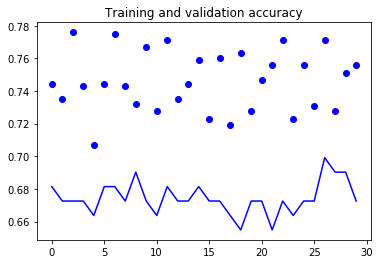

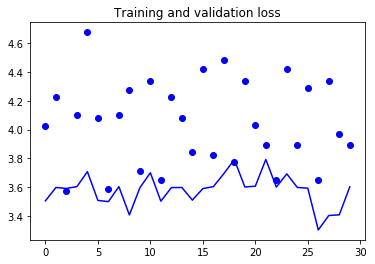

In [11]:
#Displaying curves of loss and accuracy during training 

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo')#dots
plt.plot(epochs, val_acc, 'b')#line segments
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'bo')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.show()

In [12]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch=50,
                              epochs=20,  
                    validation_data=validation_generator,
                              validation_steps=25)
history_dict = history.history
print(history_dict.keys())

model.save('damage_undamaged_conv4_2_vgg.h5')

Epoch 1/20
50/50 [==============================] - 28s - loss: 3.6986 - acc: 0.7680 - val_loss: 3.3057 - val_acc: 0.6991
Epoch 2/20
50/50 [==============================] - 30s - loss: 4.2404 - acc: 0.7340 - val_loss: 3.7051 - val_acc: 0.6637
Epoch 3/20
50/50 [==============================] - 30s - loss: 4.0816 - acc: 0.7440 - val_loss: 3.6037 - val_acc: 0.6726
Epoch 4/20
50/50 [==============================] - 30s - loss: 4.1450 - acc: 0.7400 - val_loss: 3.4974 - val_acc: 0.6814
Epoch 5/20
50/50 [==============================] - 30s - loss: 3.8577 - acc: 0.7580 - val_loss: 3.6997 - val_acc: 0.6637
Epoch 6/20
50/50 [==============================] - 30s - loss: 4.2088 - acc: 0.7360 - val_loss: 3.5982 - val_acc: 0.6726
Epoch 7/20
50/50 [==============================] - 30s - loss: 3.5714 - acc: 0.7760 - val_loss: 3.5037 - val_acc: 0.6814
Epoch 8/20
50/50 [==============================] - 30s - loss: 4.3198 - acc: 0.7290 - val_loss: 3.7928 - val_acc: 0.6549
Epoch 9/20
50/50 [======

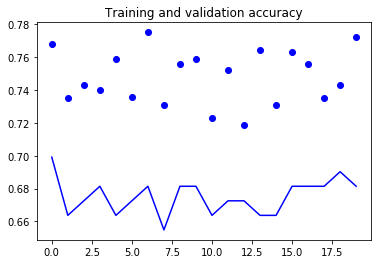

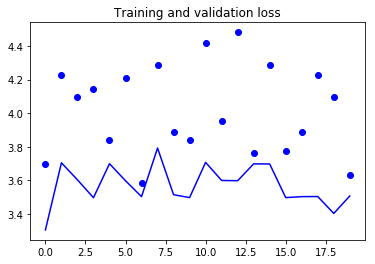

In [13]:
#Displaying curves of loss and accuracy during training 

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo')#dots
plt.plot(epochs, val_acc, 'b')#line segments
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'bo')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.show()